In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
#reading the data
data_set = pd.read_csv("Salary_Data.csv")

In [3]:
data_set.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
#Splitting the X(Independent) variable and Y(Dependent) variable seperatly
X = data_set["YearsExperience"].values.reshape(-1,1)
Y = data_set["Salary"].values.reshape(-1,1)

In [5]:
#Splitting  70% of the data to the training set while 30% of the data to test set
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 0)

In [6]:
#After splitting the data into training and testing sets, finally, the time is to train our algorithm.
#For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#To retrieve the intercept:
print(f"Intercept : {regressor.intercept_}") 

#For retrieving the slope:
print(f"Slope :  {regressor.coef_}")

Intercept : [26777.3913412]
Slope :  [[9360.26128619]]


In [8]:
#Making predictions on the test data.
y_pred = regressor.predict(X_test)

In [9]:
#Now compare the actual output values for x_test with the predicted values

df = pd.DataFrame({"Actual" : Y_test.flatten() , "Predicted" : y_pred.flatten()})
df

,Actual,Predicted
0,37731.0,40817.783270
1,122391.0,123188.082589
2,57081.0,65154.462615
3,63218.0,63282.410357
4,116969.0,115699.873560
5,109431.0,108211.664531
6,112635.0,116635.899689
7,55794.0,64218.436486
8,83088.0,76386.776158


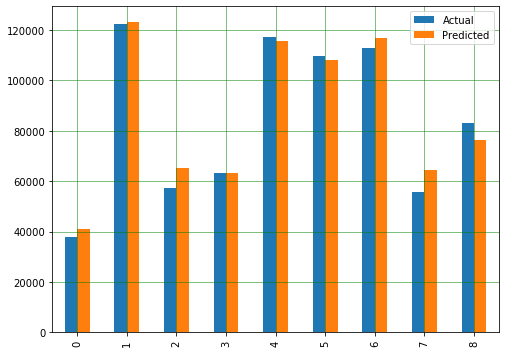

In [10]:
#Comparison Graph B/W Actual values and Prdicted values
df.plot(kind = "bar" , figsize = (8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

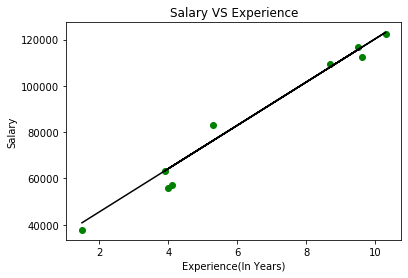

In [11]:
#Let's plot our straight line with the test data
plt.scatter(X_test,Y_test, color ="green") #Actual points
plt.plot(X_test,y_pred,color = "black") #Predicted line
plt.title("Salary VS Experience")
plt.xlabel("Experience(In Years)")
plt.ylabel("Salary")
plt.show()

In [12]:
#The straight line in the above graph shows our algorithm is correct.

In [13]:
#The final step is to evaluate the performance of the algorithm,
#this step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [14]:
#For regression algorithms, three evaluation metrics are commonly used:

#1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. 
#2. Mean Squared Error (MSE) is the mean of the squared errors.
#3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [15]:
#Let’s find the values for these metrics using our test data.

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 3737.417861878896
Mean Squared Error: 23370078.800832972
Root Mean Squared Error: 4834.260936361728


In [16]:
from sklearn.metrics import accuracy_score
print(f"Accuracy : {regressor.score(X_test,Y_test) * 100}")

Accuracy : 97.4099340721351
